In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

clf = KNeighborsClassifier(n_neighbors=3)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=123,
                                                    stratify=y
                                                       )
print("Labels for training and testing data")
print(y_train)
print(y_test)

Labels for training and testing data
[1 1 1 0 0 2 1 1 1 0 1 0 2 0 0 2 0 2 1 1 0 0 2 1 2 1 0 1 1 1 2 1 2 2 0 0 2
 2 0 0 2 2 2 2 0 2 0 2 1 1 0 2 2 0 2 1 2 1 2 1 1 0 0 1 2 0 0 2 2 1 0 1 0 0
 1]
[0 2 1 0 2 0 1 2 0 0 2 1 2 0 1 2 2 2 2 2 1 2 1 1 2 2 0 0 1 0 0 2 0 1 0 0 1
 1 2 2 0 1 0 1 1 2 0 1 1 1 0 2 2 2 1 0 0 1 1 0 2 1 0 2 0 2 1 1 2 0 2 1 0 0
 1]


In [3]:
from sklearn.metrics import accuracy_score

clf.fit(X_train, y_train)      # train
y_pred = clf.predict(X_test)   # test
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data = %.2f" % (test_accuracy * 100) + " %")

Accuracy on test data = 94.67 %


In [4]:
print('Samples correctly classified:')
correct_idx = np.where(y_pred == y_test)[0]
print(correct_idx)

print('\nSamples incorrectly classified:')
incorrect_idx = np.where(y_pred != y_test)[0]
print(incorrect_idx)

Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Samples incorrectly classified:
[44 49 54 60]


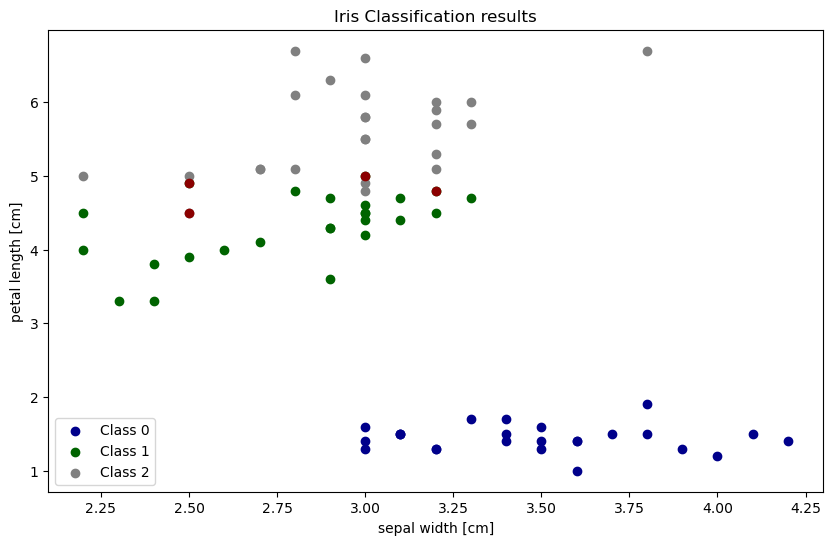

In [5]:
# Plot two dimensions
plt.figure(figsize=(10, 6))
colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, 1], X_test[idx, 2], color=color, label="Class %s" % str(n))

plt.scatter(X_test[incorrect_idx, 1], X_test[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Iris Classification results")
plt.show()

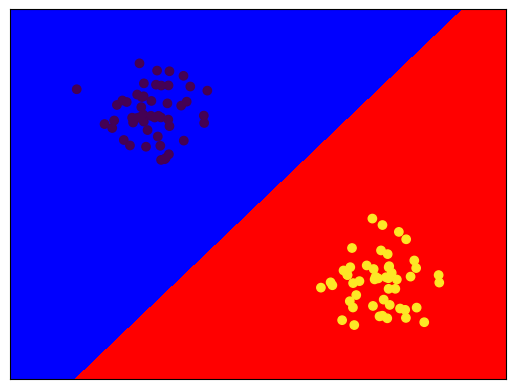

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


if __name__ == '__main__':
    from sklearn.datasets import make_blobs
    from sklearn.linear_model import LogisticRegression
    X, y = make_blobs(centers=2, random_state=42)
    clf = LogisticRegression().fit(X, y)
    plot_2d_separator(clf, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()


NameError: name 'knn' is not defined

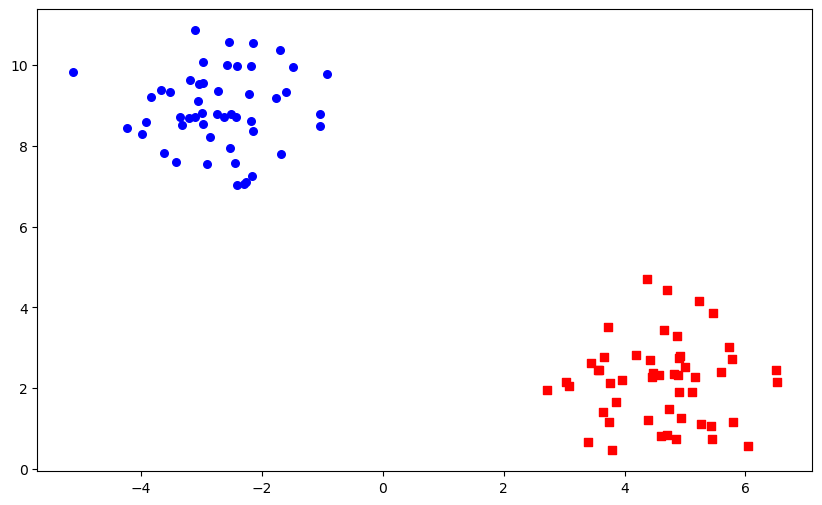

In [7]:
plt.figure(figsize=(10, 6))

# plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=30, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=30, label='1', marker='s')

# plot decision boundary
plot_2d_separator(knn, X)

plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc='upper right')

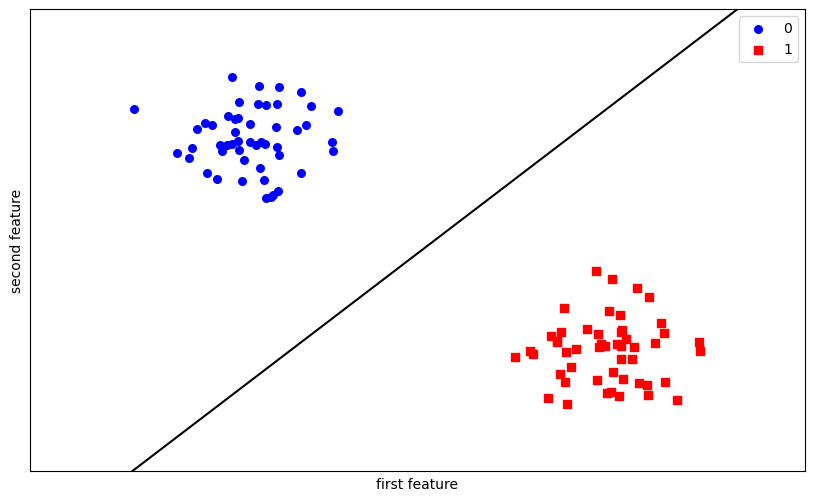

In [8]:
plt.figure(figsize=(10, 6))

# plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=30, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=30, label='1', marker='s')

# plot decision boundary
plot_2d_separator(clf, X)

plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc='upper right')

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# %load solutions/05A_knn_with_diff_k.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

X_trainsub, X_valid, y_trainsub, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.5,
                                                            random_state=1234,
                                                            stratify=y_train)

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = knn.fit(X_trainsub, y_trainsub).\
        score(X_trainsub, y_trainsub)
    valid_score = knn.score(X_valid, y_valid)
    print('k: %d, Train/Valid Acc: %.3f/%.3f' %
          (k, train_score, valid_score))


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('\n\nk=9 Test Acc: %.3f' % knn.score(X_test, y_test))


k: 1, Train/Valid Acc: 1.000/0.946
k: 2, Train/Valid Acc: 1.000/0.964
k: 3, Train/Valid Acc: 1.000/0.946
k: 4, Train/Valid Acc: 1.000/0.964
k: 5, Train/Valid Acc: 1.000/0.929
k: 6, Train/Valid Acc: 1.000/0.929
k: 7, Train/Valid Acc: 1.000/0.929
k: 8, Train/Valid Acc: 1.000/0.929
k: 9, Train/Valid Acc: 1.000/0.929
k: 10, Train/Valid Acc: 1.000/0.946
k: 11, Train/Valid Acc: 1.000/0.946
k: 12, Train/Valid Acc: 1.000/0.964
k: 13, Train/Valid Acc: 1.000/0.929
k: 14, Train/Valid Acc: 1.000/0.946
k: 15, Train/Valid Acc: 1.000/0.929
k: 16, Train/Valid Acc: 1.000/0.929
k: 17, Train/Valid Acc: 1.000/0.929
k: 18, Train/Valid Acc: 0.964/0.946
k: 19, Train/Valid Acc: 0.964/0.929


k=9 Test Acc: 0.974


In [11]:
x = np.linspace(-3, 3, 100)
print(x[:10])

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545]


In [12]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

In [13]:
print('Before: ', x.shape)
x = x[:, np.newaxis]
print('After: ', x.shape)

Before:  (100,)
After:  (100, 1)


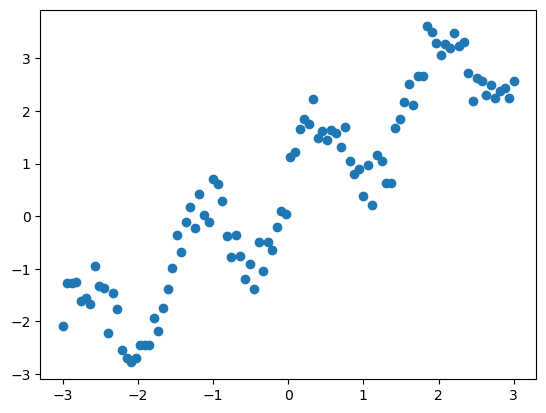

In [14]:
plt.plot(x, y, 'o');

In [15]:
from sklearn.linear_model import LinearRegression
regres=LinearRegression()


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
regres.fit(x_train,y_train)

LinearRegression()

In [18]:
print(regres.coef_)
print(regres.intercept_)

[0.90211711]
0.44840974988267995


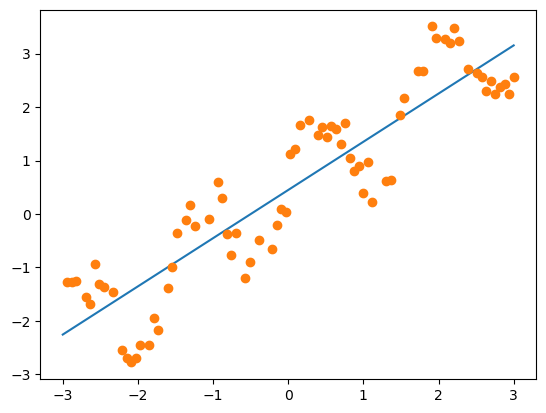

In [19]:
min_pt = x.min() * regres.coef_[0] + regres.intercept_
max_pt = x.max() * regres.coef_[0] + regres.intercept_

plt.plot([x.min(), x.max()], [min_pt, max_pt])
plt.plot(x_train, y_train, 'o');

In [20]:
y_pred_train=regres.predict(x_train)


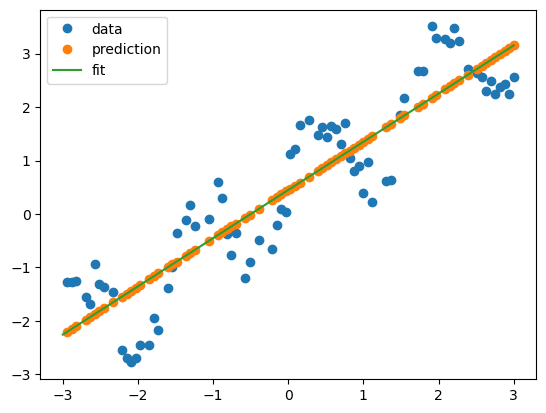

In [21]:

plt.plot(x_train, y_train, 'o', label="data")
plt.plot(x_train, y_pred_train, 'o', label="prediction")
plt.plot([x.min(), x.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

In [22]:
y_pred_test=regres.predict(x_test)


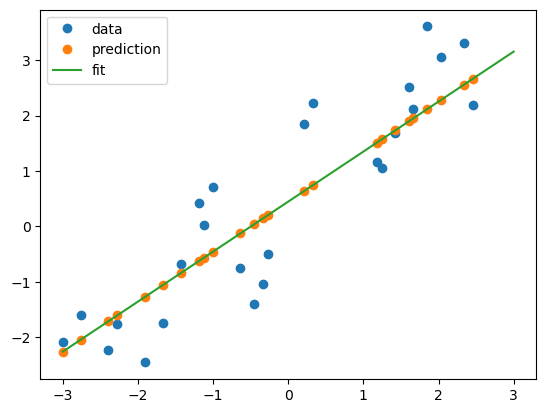

In [25]:
plt.plot(x_test, y_test, 'o', label="data")
plt.plot(x_test, y_pred_test, 'o', label="prediction")
plt.plot([x.min(), x.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

In [28]:
regres.score(x_test, y_test)

0.7994321405079685

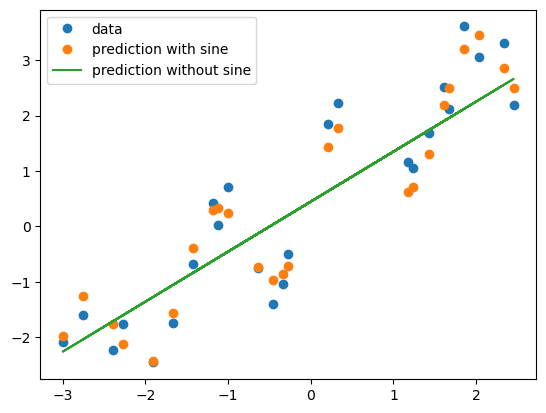

In [35]:
# %load solutions/06B_lin_with_sine.py
XX_train = np.concatenate((x_train, np.sin(4 * x_train)), axis=1)
XX_test = np.concatenate((x_test, np.sin(4 * x_test)), axis=1)
regres.fit(XX_train, y_train)
y_pred_test_sine = regres.predict(XX_test)

plt.plot(x_test, y_test, 'o', label="data")
plt.plot(x_test, y_pred_test_sine, 'o', label="prediction with sine")
plt.plot(x_test, y_pred_test, label='prediction without sine')
plt.legend(loc='best');

In [39]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

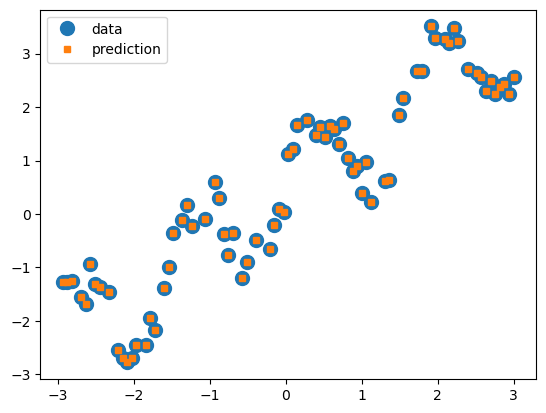

In [41]:
y_pred_train = kneighbor_regression.predict(x_train)

plt.plot(x_train, y_train, 'o', label="data", markersize=10)
plt.plot(x_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

In [45]:
y_test_pred=kneighbor_regression.predict(x_test)


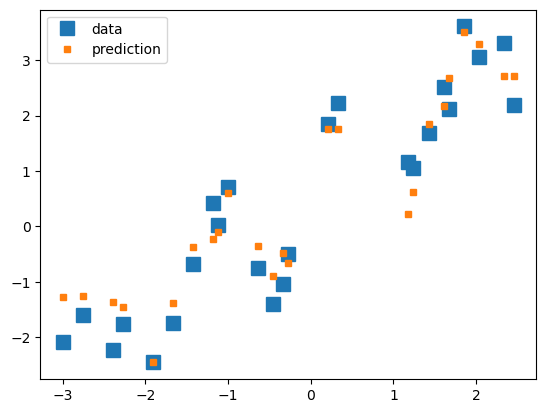

In [46]:
plt.plot(x_test,y_test,'s',label="data",markersize=10)
plt.plot(x_test,y_test_pred,'s',label="prediction",markersize=5)
plt.legend(loc='best')